In [1]:
#_____________import labs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Rizwan/Desktop/datasets/adult.csv")

In [3]:
df.sample(8)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
46817,28,Federal-gov,163862,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
5265,45,Self-emp-inc,363298,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,45,United-States,>50K
13850,37,Local-gov,175120,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States,<=50K
16294,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
36141,24,Private,388885,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,48,United-States,<=50K
39755,55,State-gov,120781,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
4689,50,Local-gov,258819,Some-college,10,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
45588,39,Private,179016,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,0,40,United-States,<=50K


In [4]:
df.keys()

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# what needs to do wwith data:
    1.drop irrrelevant columns _____'fnlwgt', 'education'
    2.remove unkwon values
    3. captilize the string columns
    4.income column to int with proper method
    5.remove duplicated values
    6.handle imblance class of income
    7.encode the  string columns to 
    8.scale the number columns

In [5]:
df.drop(['fnlwgt', 'education'],axis=1,inplace=True)

In [6]:
df.sample(6)

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25807,49,Private,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48757,35,Private,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,84,United-States,<=50K
33772,19,Private,9,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
21832,51,Local-gov,9,Separated,Protective-serv,Not-in-family,Black,Male,0,0,40,United-States,<=50K
25171,44,Private,9,Divorced,Transport-moving,Unmarried,White,Male,0,0,50,United-States,<=50K
46785,36,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K


In [7]:
# Iterate through columns and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'age': [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
Unique values in 'workclass': ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in 'educational-num': [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
Unique values in 'marital-status': ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique values in 'occupation': ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
Unique values in 'relationship': ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 

In [8]:
df.keys()

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [9]:
# Replace unknown values with mode for string columns
string_columns = df.select_dtypes(include='object').columns
for column in string_columns:
    mode_value = df[column].mode().iloc[0]
    df[column] = df[column].replace(r'\?', mode_value, regex=True)

# Replace unknown values with mean for integer columns
integer_columns = df.select_dtypes(include='number').columns
for column in integer_columns:
    mean_value = df[column].mean()
    df[column] = df[column].fillna(mean_value)


In [10]:
df.sample(5)

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
24441,29,Private,13,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,4386,0,80,United-States,>50K
47521,27,Self-emp-not-inc,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
45959,22,Private,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
1849,47,Private,10,Divorced,Transport-moving,Unmarried,White,Male,0,0,40,United-States,<=50K
26460,43,Self-emp-inc,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,70,United-States,>50K


In [11]:
# Map the values in the 'income' column to 0 and 1
income_mapping = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(income_mapping)

df['income'] = df['income'].astype(str)


In [12]:
df.sample(5)

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
42425,36,Local-gov,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
48446,51,Private,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,12,United-States,0
19034,43,Private,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,65,United-States,1
31598,53,Private,10,Widowed,Adm-clerical,Other-relative,White,Female,0,0,22,United-States,0
46258,45,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,37,United-States,1


In [13]:
df.isnull().sum()

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
# Capitalize string columns
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].apply(lambda x: x.str.capitalize())

# Print the dataset with capitalized string columns
df

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-states,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-states,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-states,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-states,1
4,18,Private,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-states,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-states,0
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-states,1
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-states,0
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-states,0


In [15]:
df.duplicated().sum()

6604

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Class distribution in 'income' column:
0    31838
1    10400
Name: income, dtype: int64
Imbalance ratio: 3.061346153846154


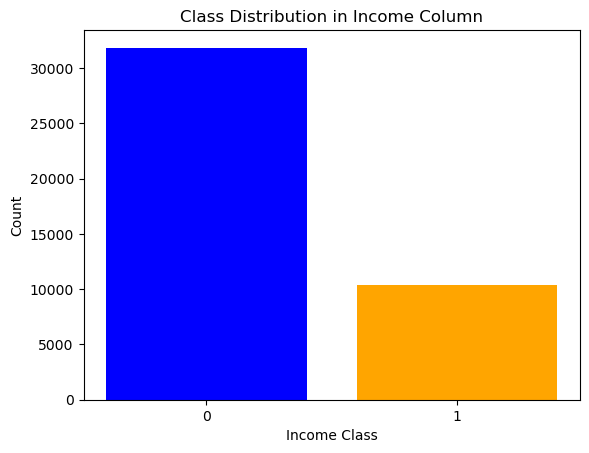

In [17]:
# Check class distribution in 'income' column
income_counts = df['income'].value_counts()

# Print class distribution
print("Class distribution in 'income' column:")
print(income_counts)

# Imbalance ratio
imbalance_ratio = income_counts[0] / income_counts[1]
print("Imbalance ratio:", imbalance_ratio)
# Class distribution data
classes = ['0', '1']
counts = [31838, 10400]

# Create a bar plot
plt.bar(classes, counts, color=['blue', 'orange'])
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.title('Class Distribution in Income Column')
plt.show()

Balanced class distribution in 'income' column:
0    31838
1    31838
Name: income, dtype: int64


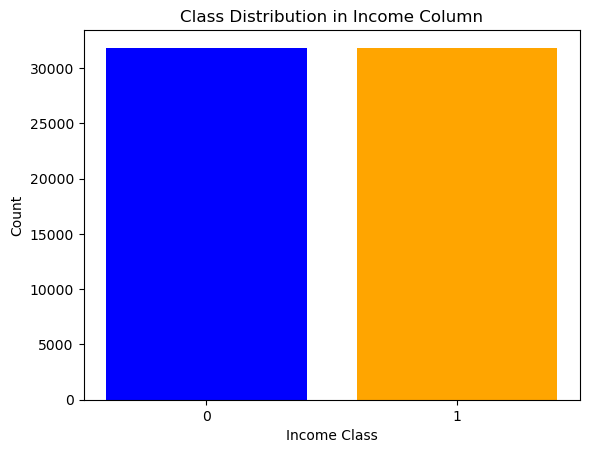

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-states,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-states,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-states,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-states,1
4,18,Private,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-states,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-states,1
48836,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-states,1
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-states,1
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-states,1


In [18]:
from imblearn.over_sampling import RandomOverSampler


# Apply Random Oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df.drop('income', axis=1), df['income'])

# Create a new DataFrame with balanced classes
balanced_dataset = pd.concat([X_resampled, y_resampled], axis=1)

# Print the balanced class distribution
balanced_income_counts = balanced_dataset['income'].value_counts()
print("Balanced class distribution in 'income' column:")
print(balanced_income_counts)

# Update the original dataset with balanced classes
df['income'] = balanced_dataset['income']
# Class distribution data
classes = ['0', '1']
counts = [31838, 31838]

# Create a bar plot
plt.bar(classes, counts, color=['blue', 'orange'])
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.title('Class Distribution in Income Column')
plt.show()
# Print the modified dataset
df


In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Identify the string columns for one-hot encoding
string_columns = df.select_dtypes(include=['object']).columns

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the encoder on the string columns
onehot_encoded = encoder.fit_transform(df[string_columns])

# Create a new DataFrame with one-hot encoded data
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(string_columns))

# Concatenate the one-hot encoded DataFrame with the original numeric columns
final_df = pd.concat([onehot_encoded_df, df.drop(string_columns, axis=1)], axis=1,join="inner")

# Print the original and one-hot encoded DataFrames
print("Original DataFrame:")
df.head()
print("\nOne-Hot Encoded DataFrame:")



C:\Users\Rizwan\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Original DataFrame:

One-Hot Encoded DataFrame:


In [20]:
final_df.sample(9)

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-af-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,...,native-country_Trinadad&tobago,native-country_United-states,native-country_Vietnam,native-country_Yugoslavia,income_1,age,educational-num,capital-gain,capital-loss,hours-per-week
20662,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,48,13,0,0,40
9228,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,18,8,0,0,22
36763,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,80,9,0,0,16
2280,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,39,10,0,0,55
21539,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,20,9,0,0,40
23683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30,12,0,0,60
17971,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,25,9,0,0,40
7979,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,36,7,0,0,40
40950,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,50,10,0,0,40


In [21]:
final_df.isna().sum().sum()

0

In [22]:
final_df.shape

(36972, 82)

In [23]:
df.shape

(42238, 13)

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36972 entries, 0 to 42237
Data columns (total 82 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   workclass_Local-gov                        36972 non-null  float64
 1   workclass_Never-worked                     36972 non-null  float64
 2   workclass_Private                          36972 non-null  float64
 3   workclass_Self-emp-inc                     36972 non-null  float64
 4   workclass_Self-emp-not-inc                 36972 non-null  float64
 5   workclass_State-gov                        36972 non-null  float64
 6   workclass_Without-pay                      36972 non-null  float64
 7   marital-status_Married-af-spouse           36972 non-null  float64
 8   marital-status_Married-civ-spouse          36972 non-null  float64
 9   marital-status_Married-spouse-absent       36972 non-null  float64
 10  marital-status_Never-m

In [ ]:
# Identify the non-numeric columns
non_int_columns = final_df.select_dtypes(exclude='int64').columns

# Round the non-numeric columns to 1 decimal place
rounded_df = final_df.copy()
rounded_df[non_int_columns] = rounded_df[non_int_columns].applymap(lambda x: round(x, 0))

# Print the original and rounded DataFrames
print("Original DataFrame:")
final_df.sample(5)
print("\nRounded DataFrame:")
rounded_df.sample(5)

In [ ]:
# Identify the float columns
float_columns = final_df.select_dtypes(include=['float']).columns

# Convert float columns to integers
final_df[float_columns] = final_df[float_columns].astype(int)

# Print the dataset with converted integer columns
final_df.sample(6)

# all the thing done :
    